# Word Embeddings using Word2Vec algorithm

In [3]:
import pandas as pd
import numpy as np

from gensim.models import Word2Vec
from time import time 
import multiprocessing
import logging  # logger
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')   #workaround to avoid matplotlib warnings 

import os

In [4]:
data_file_path = os.path.abspath(os.path.join(os.pardir,'data','cleaned_AG.csv'))
data = pd.read_csv(data_file_path)
data.head()

,News Category,Documents,Word Count,Noun Phrases,Noun Count,Adjective Count,Verb Count
0,business,wall st bear claw back black reuters reuters s...,18,4,12,3,2
1,business,carlyle look toward commercial aerospace reute...,27,5,15,4,3
2,business,oil economy cloud stock outlook reuters reuter...,24,5,17,4,2
3,business,iraq halt oil export main southern pipeline re...,28,3,19,6,3
4,business,oil price soar time record posing new menace e...,28,4,16,7,3


In [28]:
data['Documents'] = data['Documents'].str.split(" ")
data.head()

,News Category,Documents,Word Count,Noun Phrases,Noun Count,Adjective Count,Verb Count
0,business,"[wall, st, bear, claw, back, black, reuters, r...",18,4,12,3,2
1,business,"[carlyle, look, toward, commercial, aerospace,...",27,5,15,4,3
2,business,"[oil, economy, cloud, stock, outlook, reuters,...",24,5,17,4,2
3,business,"[iraq, halt, oil, export, main, southern, pipe...",28,3,19,6,3
4,business,"[oil, price, soar, time, record, posing, new, ...",28,4,16,7,3


In [29]:
cores = multiprocessing.cpu_count()

In [30]:
# initializing word2vec model
model = Word2Vec(min_count=20,
                     window=2, # window size for context 
                     vector_size=100,  # no of features 
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)

INFO - 21:35:42: Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=100, alpha=0.03)', 'datetime': '2021-04-28T21:35:42.438317', 'gensim': '4.0.1', 'python': '3.7.5 (default, Oct 25 2019, 10:52:18) \n[Clang 4.0.1 (tags/RELEASE_401/final)]', 'platform': 'Darwin-19.6.0-x86_64-i386-64bit', 'event': 'created'}


In [31]:
t = time()

# build vocabulary
model.build_vocab(data['Documents'], progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 21:35:42: collecting all words and their counts
INFO - 21:35:42: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 21:35:42: PROGRESS: at sentence #10000, processed 273130 words, keeping 18981 word types
INFO - 21:35:42: PROGRESS: at sentence #20000, processed 542961 words, keeping 26350 word types
INFO - 21:35:42: PROGRESS: at sentence #30000, processed 810845 words, keeping 31364 word types
INFO - 21:35:42: PROGRESS: at sentence #40000, processed 1079542 words, keeping 35363 word types
INFO - 21:35:42: PROGRESS: at sentence #50000, processed 1347719 words, keeping 38795 word types
INFO - 21:35:42: PROGRESS: at sentence #60000, processed 1617217 words, keeping 42012 word types
INFO - 21:35:42: PROGRESS: at sentence #70000, processed 1887970 words, keeping 44832 word types
INFO - 21:35:42: PROGRESS: at sentence #80000, processed 2156362 words, keeping 47460 word types
INFO - 21:35:42: PROGRESS: at sentence #90000, processed 2420763 words, keeping 50103 wor

Time to build vocab: 0.02 mins


In [32]:
t = time()

#train word2vec model 
model.train(data['Documents'], total_examples=model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 21:35:43: Word2Vec lifecycle event {'msg': 'training model with 7 workers on 12033 vocabulary and 100 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2', 'datetime': '2021-04-28T21:35:43.470922', 'gensim': '4.0.1', 'python': '3.7.5 (default, Oct 25 2019, 10:52:18) \n[Clang 4.0.1 (tags/RELEASE_401/final)]', 'platform': 'Darwin-19.6.0-x86_64-i386-64bit', 'event': 'train'}
INFO - 21:35:44: EPOCH 1 - PROGRESS: at 37.73% examples, 749548 words/s, in_qsize 13, out_qsize 0
INFO - 21:35:45: EPOCH 1 - PROGRESS: at 74.84% examples, 738964 words/s, in_qsize 13, out_qsize 0
INFO - 21:35:46: worker thread finished; awaiting finish of 6 more threads
INFO - 21:35:46: worker thread finished; awaiting finish of 5 more threads
INFO - 21:35:46: worker thread finished; awaiting finish of 4 more threads
INFO - 21:35:46: worker thread finished; awaiting finish of 3 more threads
INFO - 21:35:46: worker thread finished; awaiting finish of 2 more threads
INFO - 21:35:46: worker thread finished

INFO - 21:36:14: worker thread finished; awaiting finish of 6 more threads
INFO - 21:36:14: worker thread finished; awaiting finish of 5 more threads
INFO - 21:36:14: worker thread finished; awaiting finish of 4 more threads
INFO - 21:36:14: worker thread finished; awaiting finish of 3 more threads
INFO - 21:36:14: worker thread finished; awaiting finish of 2 more threads
INFO - 21:36:14: worker thread finished; awaiting finish of 1 more threads
INFO - 21:36:14: worker thread finished; awaiting finish of 0 more threads
INFO - 21:36:14: EPOCH - 9 : training on 3420491 raw words (1973119 effective words) took 4.2s, 470437 effective words/s
INFO - 21:36:15: EPOCH 10 - PROGRESS: at 22.57% examples, 448585 words/s, in_qsize 14, out_qsize 1
INFO - 21:36:16: EPOCH 10 - PROGRESS: at 48.20% examples, 477585 words/s, in_qsize 13, out_qsize 0
INFO - 21:36:17: EPOCH 10 - PROGRESS: at 69.52% examples, 457459 words/s, in_qsize 13, out_qsize 0
INFO - 21:36:18: EPOCH 10 - PROGRESS: at 92.51% examples,

INFO - 21:36:48: worker thread finished; awaiting finish of 2 more threads
INFO - 21:36:48: worker thread finished; awaiting finish of 1 more threads
INFO - 21:36:48: worker thread finished; awaiting finish of 0 more threads
INFO - 21:36:48: EPOCH - 17 : training on 3420491 raw words (1974590 effective words) took 5.0s, 398327 effective words/s
INFO - 21:36:49: EPOCH 18 - PROGRESS: at 26.07% examples, 516565 words/s, in_qsize 12, out_qsize 1
INFO - 21:36:50: EPOCH 18 - PROGRESS: at 51.07% examples, 502261 words/s, in_qsize 14, out_qsize 2
INFO - 21:36:51: EPOCH 18 - PROGRESS: at 77.18% examples, 502723 words/s, in_qsize 13, out_qsize 0
INFO - 21:36:52: worker thread finished; awaiting finish of 6 more threads
INFO - 21:36:52: worker thread finished; awaiting finish of 5 more threads
INFO - 21:36:52: worker thread finished; awaiting finish of 4 more threads
INFO - 21:36:52: worker thread finished; awaiting finish of 3 more threads
INFO - 21:36:52: worker thread finished; awaiting finish

INFO - 21:37:21: EPOCH 26 - PROGRESS: at 41.24% examples, 404816 words/s, in_qsize 14, out_qsize 2
INFO - 21:37:22: EPOCH 26 - PROGRESS: at 65.10% examples, 425436 words/s, in_qsize 13, out_qsize 0
INFO - 21:37:23: EPOCH 26 - PROGRESS: at 91.34% examples, 445065 words/s, in_qsize 12, out_qsize 1
INFO - 21:37:24: worker thread finished; awaiting finish of 6 more threads
INFO - 21:37:24: worker thread finished; awaiting finish of 5 more threads
INFO - 21:37:24: worker thread finished; awaiting finish of 4 more threads
INFO - 21:37:24: worker thread finished; awaiting finish of 3 more threads
INFO - 21:37:24: worker thread finished; awaiting finish of 2 more threads
INFO - 21:37:24: worker thread finished; awaiting finish of 1 more threads
INFO - 21:37:24: worker thread finished; awaiting finish of 0 more threads
INFO - 21:37:24: EPOCH - 26 : training on 3420491 raw words (1974291 effective words) took 4.4s, 451884 effective words/s
INFO - 21:37:25: EPOCH 27 - PROGRESS: at 25.50% examples

Time to train the model: 1.97 mins


In [49]:
# save model
# model.save('w2v_model.bin')

INFO - 00:06:37: Word2Vec lifecycle event {'fname_or_handle': 'w2v_model.bin', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-04-29T00:06:37.956762', 'gensim': '4.0.1', 'python': '3.7.5 (default, Oct 25 2019, 10:52:18) \n[Clang 4.0.1 (tags/RELEASE_401/final)]', 'platform': 'Darwin-19.6.0-x86_64-i386-64bit', 'event': 'saving'}
INFO - 00:06:38: not storing attribute cum_table
INFO - 00:06:38: saved w2v_model.bin


# Word Embedding Space Visualization using TSNE

In [34]:
#news categories 
category = ['world','sport','business','technology']

embedding_clusters = []
word_clusters = []
for word in category:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):  
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [48]:
# tsne(t-distributed stochastic neighbor embedding) - nonlinearity dimensionality reduction

tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32, verbose=1)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_2d = np.array(tsne_model.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.000s...
[t-SNE] Computed neighbors for 120 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 3.229766
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.489639
[t-SNE] KL divergence after 1950 iterations: 0.556721


In [47]:
# embedding_clusters.reshape(n*m,k).shape
# embeddings_2d.shape
tsne_model.fit_transform(embedding_clusters.reshape(n * m, k))

array([[-1.06262712e+01,  7.86570053e+01],
       [-1.28321133e+01,  4.29591103e+01],
       [-1.67001896e+01,  3.82374763e+01],
       [ 3.78921661e+01,  8.00813446e+01],
       [-2.04177151e+01,  8.40349655e+01],
       [ 2.81662579e+01,  8.24704208e+01],
       [ 3.44112053e+01,  9.38047028e+01],
       [-2.43967571e+01,  9.26927948e+01],
       [-2.16666436e+00,  3.41537819e+01],
       [-1.64383850e+01,  7.19697189e+01],
       [-1.19458418e+01,  9.37320175e+01],
       [-1.54400587e+00,  8.01941071e+01],
       [-1.93618298e+01,  5.01953621e+01],
       [ 3.56533852e+01,  7.33448563e+01],
       [-3.44504976e+00,  4.88845749e+01],
       [-2.77701616e-01,  9.28506775e+01],
       [ 2.96587429e+01,  6.24174805e+01],
       [ 4.64941835e+00,  7.23433838e+01],
       [ 5.47979202e+01,  8.92214966e+01],
       [ 4.39782944e+01,  5.77077522e+01],
       [ 5.18667068e+01,  4.97722168e+01],
       [-9.42606049e+01, -3.65554161e+01],
       [-2.80038967e+01,  7.31986847e+01],
       [ 1.

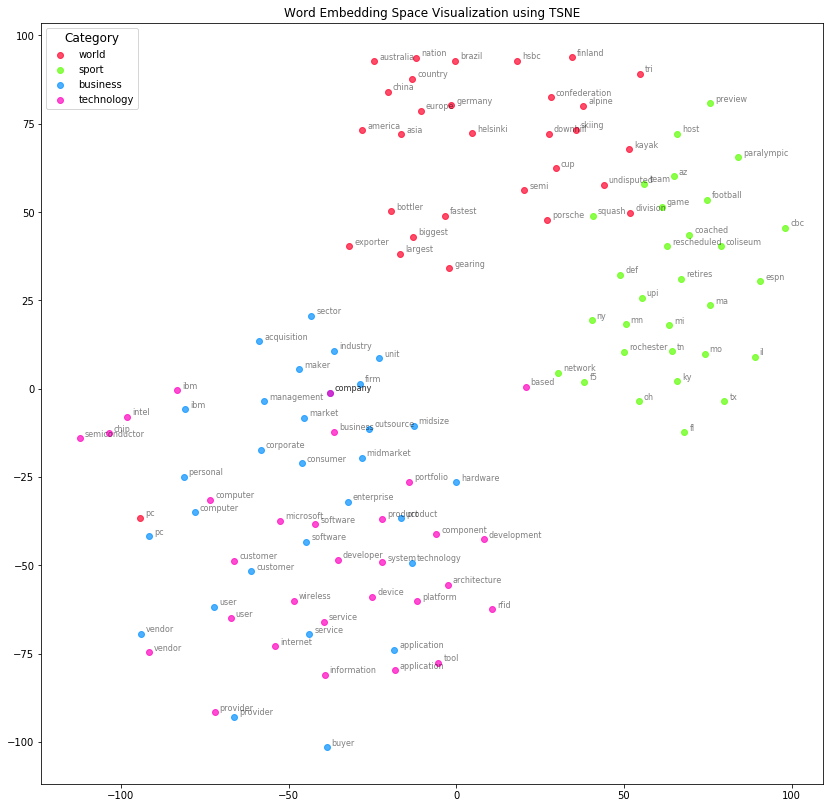

In [36]:
def tsne_plot(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(14, 14))
    plt.title('Word Embedding Space Visualization using TSNE')
    colors = cm.gist_rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', size=8)
    plt.legend(title="Category", loc='upper left', title_fontsize=12)
    image_file_path = os.path.abspath(os.path.join(os.pardir,'word2vec_visualization'.format(category)))
    plt.savefig(image_file_path, bbox_inches='tight')
    plt.show()


tsne_plot(category, embeddings_2d, word_clusters)